In [1]:
import numpy as np
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\p.schambach\\Desktop\\DSR\\drone_steering\\models\\playground'

In [5]:
# if necessary, change to drone_steering directory.


os.chdir('../..')
os.getcwd()


'C:\\Users\\p.schambach\\Desktop\\DSR\\drone_steering'

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from app_local.module import XCentralizer, YCentralizer, YScaler
from app_local.module import LabelGenerator, DataEnsembler

In [8]:
de = DataEnsembler(ms_per_frame=120)

data_directory = 'data/gesture/'
de.investigate_available_datafiles( data_dir = data_directory)

de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01.csv
1,features_flip_l_01_120.csv,labels_flip_l_01.csv
2,features_flip_p_01_120.csv,labels_flip_p_01.csv
3,features_move_c_01_120.csv,labels_move_c_01.csv
4,features_move_l_01_120.csv,labels_move_l_01.csv
5,features_move_p_01_120.csv,labels_move_p_01.csv
6,features_none_p_01_120.csv,labels_none.csv


In [9]:
de.load_data()
de.assemble_data(tolerance_range = 600, max_error = 500)
de.display_information()

i: 0 	shape X: (537, 17, 16) 	shape y: (537,) 	count: 35
i: 1 	shape X: (557, 17, 16) 	shape y: (557,) 	count: 111
i: 2 	shape X: (532, 17, 16) 	shape y: (532,) 	count: 67
i: 3 	shape X: (649, 17, 16) 	shape y: (649,) 	count: 85
i: 4 	shape X: (588, 17, 16) 	shape y: (588,) 	count: 105
i: 5 	shape X: (565, 17, 16) 	shape y: (565,) 	count: 86
i: 6 	shape X: (541, 17, 16) 	shape y: (541,) 	count: 0
-----------------------------------------------------------------------------
shape final X: (3969, 17, 16)
number of labeled samples: 489


In [10]:
feature_names = list(de.LabelGenerators[0].feature_names)
feature_names

['leftElbow_x',
 'leftElbow_y',
 'leftHip_x',
 'leftHip_y',
 'leftShoulder_x',
 'leftShoulder_y',
 'leftWrist_x',
 'leftWrist_y',
 'rightElbow_x',
 'rightElbow_y',
 'rightHip_x',
 'rightHip_y',
 'rightShoulder_x',
 'rightShoulder_y',
 'rightWrist_x',
 'rightWrist_y']

In [11]:
X = de.X.copy()

In [12]:
X.shape

(3969, 17, 16)

In [13]:
x = X[0,:,:]

In [14]:
x.shape

(17, 16)

In [15]:
xdf = pd.DataFrame(x, columns=feature_names)
xdf

,leftElbow_x,leftElbow_y,leftHip_x,leftHip_y,leftShoulder_x,leftShoulder_y,leftWrist_x,leftWrist_y,rightElbow_x,rightElbow_y,rightHip_x,rightHip_y,rightShoulder_x,rightShoulder_y,rightWrist_x,rightWrist_y
0,320.887687,182.349062,314.347552,230.816000,311.561103,125.659389,332.064043,235.748133,239.796790,185.566538,270.312635,231.982183,246.479521,121.432370,238.622666,241.018966
1,322.069697,182.833418,312.400498,233.233930,311.775849,125.657545,333.605781,237.301374,240.632927,184.094592,270.662814,232.942973,245.513863,121.647967,247.402520,238.586548
2,322.733250,182.889811,312.725625,232.988002,312.460549,126.066225,335.213848,238.292147,240.536637,184.266400,267.074018,230.834356,248.820106,122.612895,240.552820,238.763562
3,325.253514,183.365339,313.866852,234.030783,313.511280,125.171998,336.657547,238.603840,242.282477,184.875989,268.914766,230.071647,247.527299,122.934101,243.246776,241.186820
4,323.620918,183.180860,310.670503,234.276107,313.255297,126.910689,336.853370,237.451494,240.647002,185.070646,267.832464,230.431902,250.166794,123.419319,241.640053,240.803162
5,323.090994,184.077576,317.752579,231.460725,312.196414,127.994862,338.070173,232.648487,239.929596,186.889701,268.311177,231.184368,248.294276,126.242117,241.872134,242.278238
6,324.668134,188.474397,316.017503,237.736033,313.864762,128.629241,336.794965,239.626484,241.915958,186.159248,269.160983,233.061251,249.231858,127.466965,240.461069,240.518408
7,326.456644,190.725710,312.720542,236.918252,315.057335,129.656114,337.142441,241.566937,241.965089,191.363663,269.535072,234.898362,250.416483,128.088089,240.894572,243.073625
8,327.129586,190.746895,313.637477,238.625200,314.687640,131.927222,335.126934,243.119827,242.024015,191.645347,268.728690,237.653684,248.160528,129.663223,247.382529,244.308246
9,327.632457,193.380515,313.994246,240.113169,312.675104,135.144087,335.402439,243.145736,242.149950,192.917389,270.097019,240.542124,249.696176,134.191142,246.496354,245.074364


In [16]:
feat_dict = {feature:feature_names.index(feature) for feature in feature_names}
feat_dict

{'leftElbow_x': 0,
 'leftElbow_y': 1,
 'leftHip_x': 2,
 'leftHip_y': 3,
 'leftShoulder_x': 4,
 'leftShoulder_y': 5,
 'leftWrist_x': 6,
 'leftWrist_y': 7,
 'rightElbow_x': 8,
 'rightElbow_y': 9,
 'rightHip_x': 10,
 'rightHip_y': 11,
 'rightShoulder_x': 12,
 'rightShoulder_y': 13,
 'rightWrist_x': 14,
 'rightWrist_y': 15}

In [17]:
idx_x = [feat_dict[key] for key in feat_dict.keys() if key.endswith('_x')]
idx_x

[0, 2, 4, 6, 8, 10, 12, 14]

In [18]:
idx_y = [feat_dict[key] for key in feat_dict.keys() if key.endswith('_y')]
idx_y

[1, 3, 5, 7, 9, 11, 13, 15]

In [19]:
idx_hip_shoulder_x = [feat_dict[key] for key in feat_dict.keys()\
                      if key.endswith('_x') and ('Hip' in key or 'Shoulder' in key) ]
idx_hip_shoulder_x

[2, 4, 10, 12]

In [20]:
idx_hip_y = [feat_dict[key] for key in feat_dict.keys() if key.endswith('_y') and ('Hip' in key) ]
idx_hip_y

[3, 11]

In [21]:
idx_shoulder_y = [feat_dict[key] for key in feat_dict.keys() if key.endswith('_y') and ('Shoulder' in key) ]
idx_shoulder_y

[5, 13]

In [22]:
idx_hip_shoulder_y = sorted(idx_shoulder_y + idx_hip_y)
idx_hip_shoulder_y 

[3, 5, 11, 13]

In [23]:
x[:,idx_hip_shoulder_x].mean(axis = 1)

array([285.67520297, 285.08825612, 285.27007458, 285.95504925,
       285.4812647 , 286.63861145, 287.06877662, 286.93235817,
       286.3035839 , 286.61563638, 286.8201952 , 286.91029893,
       288.01997132, 287.58337698, 288.4068243 , 289.0015775 ,
       290.9767526 ])

In [24]:
mX = X[:,:,idx_hip_shoulder_x].mean(axis = 2)
mX.shape

(3969, 17)

In [25]:
xX = X[:,:,idx_x]
xX.shape

(3969, 17, 8)

In [26]:
# each timestep is centralized. Trailing dimensions have to be equal ==> transpose
X = de.X.copy()
X[:,:,idx_x] = (X[:,:,idx_x].transpose() - X[:,:,idx_hip_shoulder_x].mean(axis = 2).transpose()).transpose()
X[:,:,idx_y] = (X[:,:,idx_y].transpose() - X[:,:,idx_hip_shoulder_y].mean(axis = 2).transpose()).transpose()
abs(X[:,:,idx_hip_shoulder_x].mean(axis = (1,2))).sum()

2.2820960807353804e-11

In [27]:
X = de.X.copy()
print(X[:,:,idx_hip_shoulder_x].mean(axis = (1,2)).shape)
print(X[:,:,idx_x].shape)
X[:,:,idx_x] = (X[:,:,idx_x].transpose() - X[:,:,idx_hip_shoulder_x].mean(axis = (1,2)).transpose()).transpose()
abs(X[:,:,idx_hip_shoulder_x].mean(axis = (2))).sum()
len(X.shape)

(3969,)
(3969, 17, 8)


3

In [28]:
def centralize(M, byrow = True):
    X = M.copy()
    
    if len(M.shape) != 3:
        raise IndexError("Input Array does not have the right dimensions")
        
    if byrow:
        ax = (2)
    else: # by sample
        ax = (1,2)
        
    X[:,:,idx_x] = (X[:,:,idx_x].transpose() - X[:,:,idx_hip_shoulder_x].mean(axis = ax).transpose()).transpose()
    X[:,:,idx_y] = (X[:,:,idx_y].transpose() - X[:,:,idx_hip_shoulder_y].mean(axis = ax).transpose()).transpose()
    
    return X
    

In [29]:
X = de.X.copy()
print(X.shape)

ax = (2)
A = (X[:,:,idx_shoulder_y].mean(axis = ax) - X[:,:,idx_hip_y].mean(axis = ax))
print(A.shape)

ax = (1,2)
b = (X[:,:,idx_shoulder_y].mean(axis = ax) - X[:,:,idx_hip_y].mean(axis = ax))
print(b.shape)

(3969, 17, 16)
(3969, 17)
(3969,)


In [30]:
def scale(M, byrow = True):
    X = M.copy()
    
    if len(M.shape) != 3:
        raise IndexError("Input Array does not have the right dimensions")
        
    if byrow:
        ax = (2)
    else: # by sample
        ax = (1,2)
        
    X = (X.transpose() / (X[:,:,idx_shoulder_y].mean(axis = ax) - X[:,:,idx_hip_y].mean(axis = ax)).transpose()).transpose()
    
    return X

In [31]:
print((X.transpose() / b.transpose()).transpose().shape)
print((X.transpose() / A.transpose()).transpose().shape)

(3969, 17, 16)
(3969, 17, 16)


In [32]:
M = np.zeros((3,3,16))

for x in range(3):
    for y in range(3):
        for z in range(16):
            M[x,y,z] = (x * 10 + y) * ((-1) ** (z%2))
            
M[1,:,:]

array([[ 10., -10.,  10., -10.,  10., -10.,  10., -10.,  10., -10.,  10.,
        -10.,  10., -10.,  10., -10.],
       [ 11., -11.,  11., -11.,  11., -11.,  11., -11.,  11., -11.,  11.,
        -11.,  11., -11.,  11., -11.],
       [ 12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12.,
        -12.,  12., -12.,  12., -12.]])

In [33]:
Z = centralize(M, byrow=True)
Z[1,:,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
Z = centralize(M, byrow=False)
Z[1,:,:]

array([[-1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,
         1., -1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
        -1.,  1., -1.]])

In [35]:
class GestureTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_names, byrow = True):
        self.byrow = byrow
        self.feature_names = feature_names
        self.feat_dict = {feature:feature_names.index(feature) for feature in feature_names}
        self.idx_x = [self.feat_dict[key] for key in self.feat_dict.keys() if key.endswith('_x')]
        self.idx_y = [self.feat_dict[key] for key in self.feat_dict.keys() if key.endswith('_y')]
        self.idx_hip_shoulder_x = [feat_dict[key] for key in self.feat_dict.keys()\
                      if key.endswith('_x') and ('Hip' in key or 'Shoulder' in key) ]
        self.idx_hip_y = [feat_dict[key] for key in self.feat_dict.keys()\
                      if key.endswith('_y') and ('Hip' in key) ]
        self.idx_shoulder_y = [feat_dict[key] for key in self.feat_dict.keys()\
                      if key.endswith('_y') and ('Shoulder' in key) ]
        self.idx_hip_shoulder_y = sorted(self.idx_hip_y + self.idx_shoulder_y)
        
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        
        Z = X.copy()
        
        if self.byrow:
            ax = (2)
        else:
            ax = (1,2)
         
        self.x_shift = Z[:,:,idx_hip_shoulder_x].mean(axis = ax)
        Z[:,:,idx_x] = (Z[:,:,idx_x].transpose() - self.x_shift.transpose()).transpose()
        
        self.y_shift = Z[:,:,idx_hip_shoulder_y].mean(axis = ax)
        Z[:,:,idx_y] = (Z[:,:,idx_y].transpose() - self.y_shift.transpose()).transpose()
        
        self.scale = (Z[:,:,idx_shoulder_y].mean(axis = ax) - Z[:,:,idx_hip_y].mean(axis = ax))
        Z = (Z.transpose() / self.scale.transpose()).transpose()    
        
        return Z
    
gt = GestureTransformer(feature_names)
gt.transform(de.X)[900,:,:]

array([[-0.30877843,  0.06887989, -0.19330071, -0.47943929, -0.30341244,
         0.4956102 , -0.29297107, -0.3830554 ,  0.40138342, -0.01891026,
         0.20546981, -0.52056071,  0.29124334,  0.5043898 ,  0.47015547,
        -0.39514978],
       [-0.16224371, -0.01244581, -0.17304011, -0.48006514, -0.28766589,
         0.5229988 , -0.03692697, -0.01753412,  0.36752163, -0.09253463,
         0.18116652, -0.51993486,  0.27953948,  0.4770012 ,  0.52005236,
        -0.4295109 ],
       [-0.21620736,  0.18025052, -0.1502083 , -0.48736484, -0.2752241 ,
         0.54241201,  0.0570429 ,  0.35346116,  0.40288044, -0.05780108,
         0.15192237, -0.51263516,  0.27351003,  0.45758799,  0.42103945,
        -0.18198949],
       [-0.24770927,  0.40971796, -0.23670068, -0.50871009, -0.23632263,
         0.49711599, -0.05415422,  0.64335968,  0.41549347, -0.05741075,
         0.14939098, -0.49128991,  0.32363232,  0.50288401,  0.43182002,
        -0.40527267],
       [-0.18599137,  0.44992121, -0

In [36]:
P = gt.transform(de.X)

In [37]:
de.y[123]

5.0

{'leftElbow_x': 0, 'leftElbow_y': 1, 'leftHip_x': 2, 'leftHip_y': 3, 'leftShoulder_x': 4, 'leftShoulder_y': 5, 'leftWrist_x': 6, 'leftWrist_y': 7, 'rightElbow_x': 8, 'rightElbow_y': 9, 'rightHip_x': 10, 'rightHip_y': 11, 'rightShoulder_x': 12, 'rightShoulder_y': 13, 'rightWrist_x': 14, 'rightWrist_y': 15}


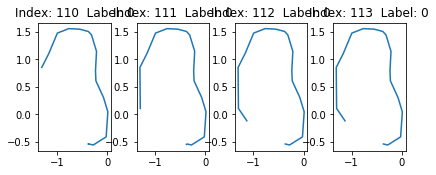

In [50]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
print(feat_dict)

i = 110
key = 'leftWrist'
kx = key + '_x'
ky = key + '_y'

#axes = plt.gca()
#axes.set_xlim([-2,2])
#axes.set_ylim([-2,2])
plt.figure(1)

plt.subplot(241)
plt.plot(P[i,:,feat_dict[kx]],P[i,:,feat_dict[ky]])
plt.title("Index: " + str(i) + "  " + "Label: " + str(int(de.y[i])))

plt.subplot(242)
plt.plot(P[i+1,:,feat_dict[kx]],P[i+1,:,feat_dict[ky]])
plt.title("Index: " + str(i+1) + "  " + "Label: " + str(int(de.y[i+1])))

plt.subplot(243)
plt.plot(P[i+2,:,feat_dict[kx]],P[i+2,:,feat_dict[ky]])
plt.title("Index: " + str(i+2) + "  " + "Label: " + str(int(de.y[i+2])))

plt.subplot(244)
plt.plot(P[i+2,:,feat_dict[kx]],P[i+2,:,feat_dict[ky]])
plt.title("Index: " + str(i+3) + "  " + "Label: " + str(int(de.y[i+3])))

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=1, bottom=0.0, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()